In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
y_true = np.array([0,1,2,3,0,4,1,2,2,4,2,2,10,1,1,0,5,2,2,3,7])

Text(0.5, 1.0, 'Label: 3')

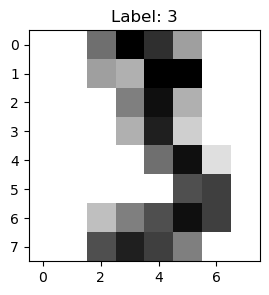

In [3]:
sample_index = 45
plt.figure(figsize=(3,3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Label: %i' % digits.target[sample_index])

# Preprocessing
- Normalization
-  Train / Test Split

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype=np.float32)
target = np.asarray(digits.target, dtype=np.int32)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=37)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

## Helper Functions

In [5]:
def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

In [6]:
one_hot(10, np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [7]:
def softmax(X):
    return np.exp(X) / np.sum(np.exp(X), axis=-1, keepdims=True)

In [8]:
print(softmax(np.array([[1, 2, 3], [4, 5, 6]])))

[[0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]]


In [9]:
def nll(Y_true, Y_pred):
    Y_true = np.asarray(Y_true)
    Y_pred = np.asarray(Y_pred)

    # Check 2D
    Y_true, Y_pred = np.atleast_2d(Y_true), np.atleast_2d(Y_pred)

    loglikelihood = np.sum(np.log(Y_pred + 0.0001) * Y_true, axis = 1)

    return -np.mean(loglikelihood)

In [10]:
class LogisticRegression():

    def __init__(self, input_size, output_size):
        self.W = np.random.uniform(size = (input_size, output_size), high = 0.1, low = -0.1)
        self.b = np.random.uniform(size = output_size, high = 0.1, low = -0.1)
        self.output_size = output_size
    
    def forward(self, X):
        Z = np.dot(X, self.W) + self.b
        return softmax(Z)
    
    def predict(self, X):
        return np.argmax(self.forward(X), axis = -1)
    
    # SGD
    def grad_loss(self, x, y_true):
        # Predictions
        y_pred = self.forward(x)
        # Calculate nll_loss derivative (da/dz): in case of nll & softmax: da/dz = y_pred - one_hot(y_true)
        dz = y_pred - one_hot(self.output_size, y_true)

        grad_W = x.reshape(-1,1) @ dz.reshape(-1,1).T
        grad_b = dz

        grads = {'W': grad_W, 'b': grad_b}
        return grads

    def train(self, x, y, learning_rate):
        grads = self.grad_loss(x,y)
        self.W = self.W - learning_rate * grads['W']
        self.b = self.b - learning_rate * grads['b']


    def loss(self, X, y):
        # nll(y_true,y_pred)
        # one_hot(output_size, y)
        return nll(one_hot(self.output_size, y), self.forward(X))
    
    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis = -1)
        return np.mean(y_preds == y)

In [11]:
n_features = X_train.shape[1]
n_classes = len(np.unique(y_train))
lr = LogisticRegression(n_features, n_classes)

print("Evaluate before training: ")
print("Loss: ", lr.loss(X_test, y_test))
print("train accuracy: ", lr.accuracy(X_train, y_train))
print("test accuracy: ", lr.accuracy(X_test, y_test))

Evaluate before training: 
Loss:  2.3294110690891525
train accuracy:  0.14996725605762934
test accuracy:  0.10740740740740741


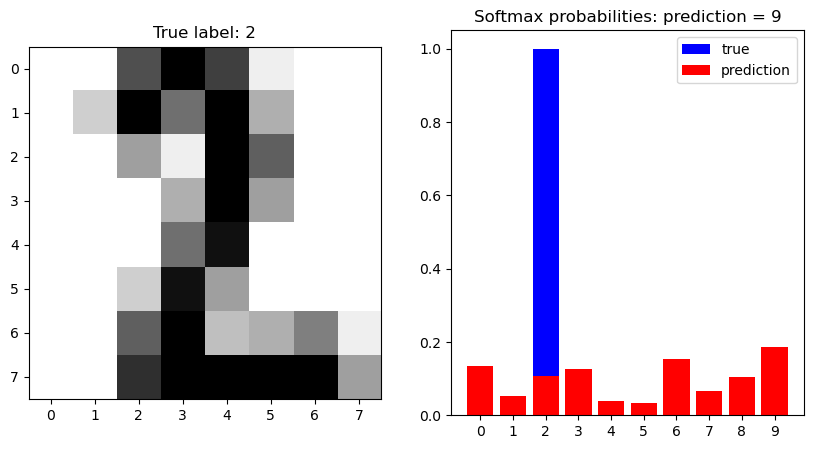

In [12]:
def plot_predictionn(model, sample_idx = 0, classes = range(10)):
    fig, axes = plt.subplots(nrows =1, ncols = 2, figsize = (10, 5))

    axes[0].imshow(scaler.inverse_transform([X_test[sample_idx]]).reshape(8,8), cmap = plt.cm.gray_r)
    axes[0].set_title("True label: %i" % y_test[sample_idx])


    axes[1].bar(classes, one_hot(len(classes), y_test[sample_idx]), label='true', color = "b")
    axes[1].bar(classes, model.forward(X_test[sample_idx]), label = "prediction", color = "r")
    axes[1].set_title(f"Softmax probabilities: prediction = {model.predict(X_test[sample_idx])}")
    axes[1].set_xticks(np.arange(10))
    axes[1].legend()


plot_predictionn(lr, sample_idx = 0, classes = range(10))

## Training

In [13]:
y_train.shape

(1527,)

In [14]:
x = np.random.random((64, 1))
dz = np.random.random((10, 1))


(x @ dz.T).shape

(64, 10)

In [15]:
learning_rate = 0.01

for i, (x, y) in enumerate(zip(X_train, y_train)):
    lr.train(x, y, learning_rate)
    if i % 100 == 0:
        print(f"update {i}: ", end = "")
        print("Loss: ", lr.loss(X_test, y_test), end = "")
        print("train accuracy: ", lr.accuracy(X_train, y_train), end = "")
        print("test accuracy: ", lr.accuracy(X_test, y_test))

update 0: Loss:  2.2904781000589822train accuracy:  0.19646365422396855test accuracy:  0.15925925925925927
update 100: Loss:  1.2592369132990446train accuracy:  0.7518009168303864test accuracy:  0.7555555555555555
update 200: Loss:  0.8165175919116724train accuracy:  0.862475442043222test accuracy:  0.8740740740740741
update 300: Loss:  0.6058597321349564train accuracy:  0.899803536345776test accuracy:  0.9111111111111111
update 400: Loss:  0.4907044278316368train accuracy:  0.9030779305828421test accuracy:  0.9148148148148149
update 500: Loss:  0.43355923645781835train accuracy:  0.9109364767518009test accuracy:  0.9296296296296296
update 600: Loss:  0.3764960398852692train accuracy:  0.9259986902423052test accuracy:  0.9407407407407408
update 700: Loss:  0.34681181911677106train accuracy:  0.9286182056319581test accuracy:  0.9518518518518518
update 800: Loss:  0.3201077103216225train accuracy:  0.9318925998690243test accuracy:  0.9555555555555556
update 900: Loss:  0.3026868330680034

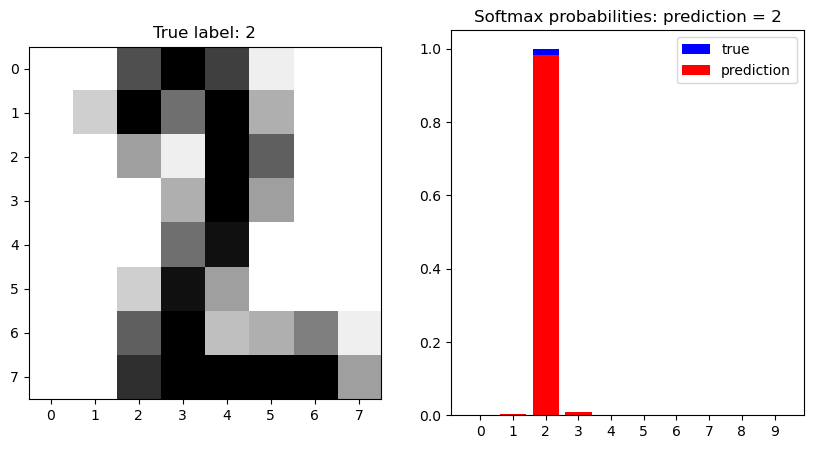

In [16]:
plot_predictionn(lr, sample_idx = 0, classes = range(10))

# FeedForward MultiLayer Perceptron

In [17]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def dsigmoid(X):
    return sigmoid(X) * (1 - sigmoid(X))

In [18]:
class NueralNet():

    def __init__(self, input_size, hidden_size, output_size):
        self.W_h = np.random.uniform(size = (input_size, hidden_size), high = 0.1, low = -0.1)
        self.b_h = np.zeros((hidden_size))
        self.W_o = np.random.uniform(size = (hidden_size, output_size), high = 0.1, low = -0.1)
        self.b_o = np.zeros((output_size))
        self.output_size = output_size

    def forward(self, X, keep_activations = False):
        z_h = X @ self.W_h + self.b_h
        a_h = sigmoid(z_h)
        z_o = a_h @ self.W_o + self.b_o
        a_o = sigmoid(z_o)

        if keep_activations:
            # Will be used in backpropagation
            return a_o, z_o, a_h, z_h
        else:
            return a_o
            
    def loss(self, X, y):
        return nll(one_hot(self.output_size, y), self.forward(X))
        
    # SGD
    def backprop(self, x, y):
        # apply fwd prop
        # a_o is the y_predicted
        a_o, z_o, a_h, z_h = self.forward(x, True)
        # Convert y to 1 hot
        y = one_hot(self.output_size, y)

        da_o = ((1 - y) / (1 - a_o)) - (y / a_o)
        dz_o = da_o * dsigmoid(z_o)
        dW_o = a_h.reshape(-1,1) @ dz_o.reshape(-1,1).T
        db_o = dz_o

        da_h = self.W_o.T @ dz_o
        dz_h = da_h * dsigmoid(z_h)
        dW_h = x.reshape(-1,1) @ dz_h.reshape(-1,1).T
        db_h = dz_h

        grads = {'W_o': dW_o, 'b_o': db_o, 'W_h': dW_h, 'b_h': db_h}
        return grads
        

    def train(self, x, y, learning_rate):
        grads = self.backprop(x, y)
        self.W_h = self.W_h - learning_rate * grads["W_h"]
        self.b_h = self.b_h - learning_rate * grads["b_h"]
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]
        
    def predict(self, X):
        return np.argmax(self.forward(X), axis = -1)
    
    def accuracy(self, X, y):
        return np.mean(self.predict(X) == y)



In [19]:
model = NueralNet(n_features, 10, n_classes)

In [20]:
print("Evaluate before training: ")
print("Loss: ", model.loss(X_test, y_test))
print("train accuracy: ", model.accuracy(X_train, y_train))
print("test accuracy: ", model.accuracy(X_test, y_test))

Evaluate before training: 
Loss:  0.6762736527352483
train accuracy:  0.09757694826457106
test accuracy:  0.10740740740740741


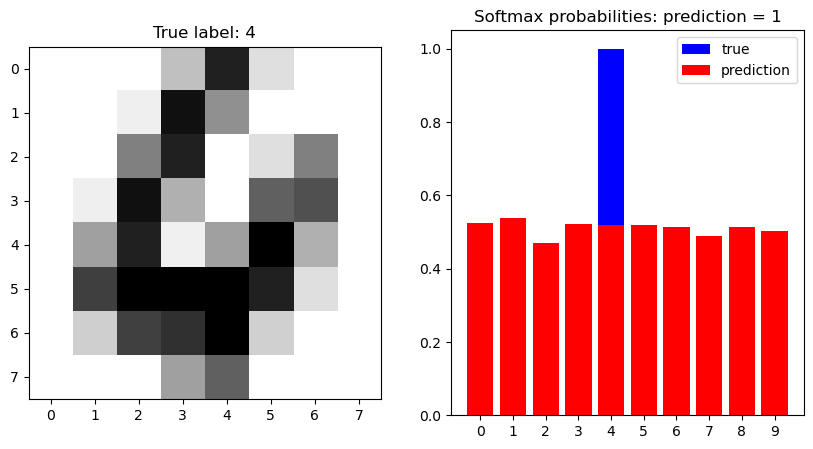

In [21]:
plot_predictionn(model, 1)

In [22]:
losses, acc, acc_test = [], [], []
losses.append(model.loss(X_train, y_train))
acc.append(model.accuracy(X_train, y_train))
acc_test.append(model.accuracy(X_test, y_test))

print(losses[-1], acc[-1], acc_test[-1])

for epoch in range(15):
    for i, (x,y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)
    losses.append(model.loss(X_train, y_train))
    acc.append(model.accuracy(X_train, y_train))
    acc_test.append(model.accuracy(X_test, y_test))

    print(f"epoch {epoch} {losses[-1]}, {acc[-1]}, {acc_test[-1]}")

0.6757111287981761 0.09757694826457106 0.10740740740740741
epoch 0 0.43153829391610893, 0.9187950229207597, 0.9185185185185185
epoch 1 0.23809566314515176, 0.9548133595284872, 0.9481481481481482
epoch 2 0.18876091450576424, 0.9659462999345121, 0.9444444444444444
epoch 3 0.15761855242405995, 0.971185330713818, 0.9444444444444444
epoch 4 0.12763297967984036, 0.9777341191879503, 0.9444444444444444
epoch 5 0.11580904047985432, 0.9731499672560576, 0.9296296296296296
epoch 6 0.10211537818878938, 0.9816633922724296, 0.9185185185185185
epoch 7 0.09462450391366742, 0.9849377865094957, 0.9333333333333333
epoch 8 0.07955038364627946, 0.9895219384413884, 0.9259259259259259
epoch 9 0.09016435810726252, 0.9790438768827767, 0.9222222222222223
epoch 10 0.06404298253380139, 0.991486574983628, 0.9222222222222223
epoch 11 0.062409023636618106, 0.991486574983628, 0.9333333333333333
epoch 12 0.05649494264591468, 0.9927963326784545, 0.9333333333333333
epoch 13 0.05277960264994274, 0.991486574983628, 0.93333

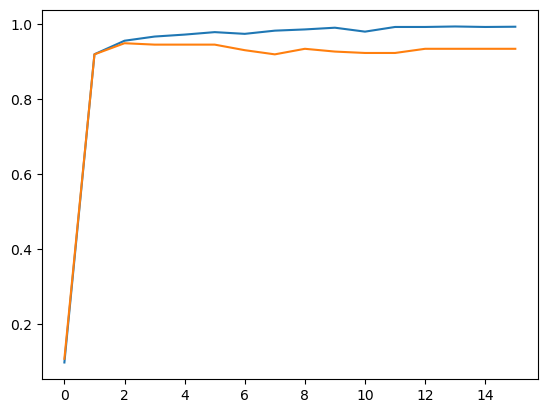

In [23]:
plt.plot(acc)
plt.plot(acc_test)

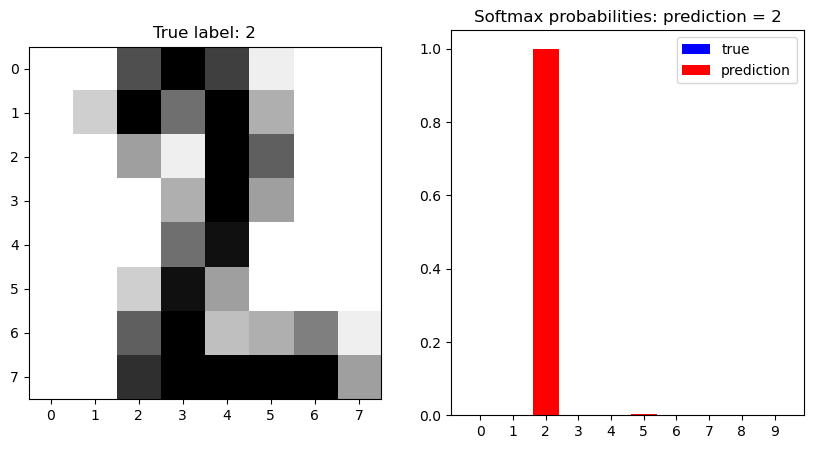

In [24]:
plot_predictionn(model, sample_idx = 0)

# Exercisces

### Look at worst prediction errors

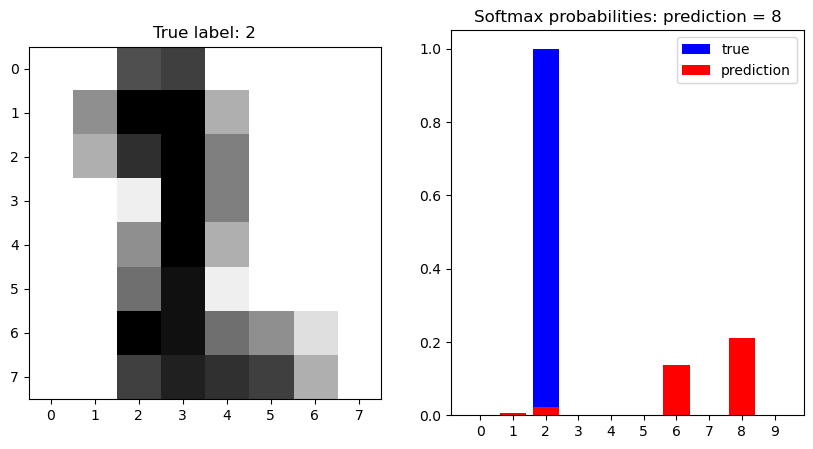

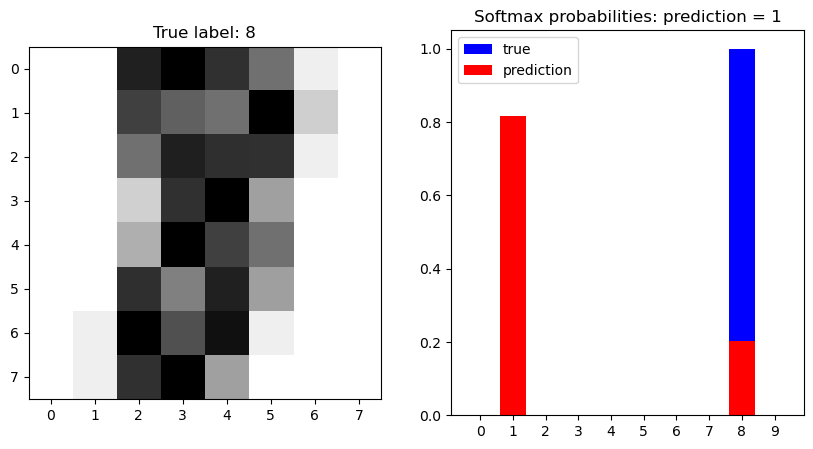

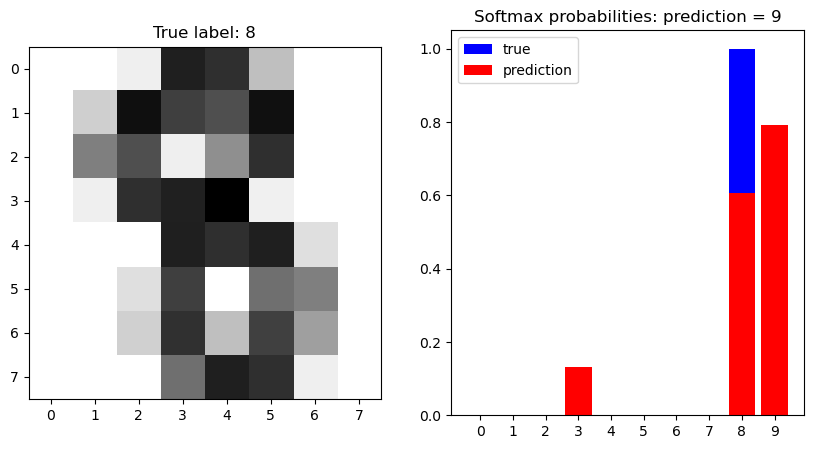

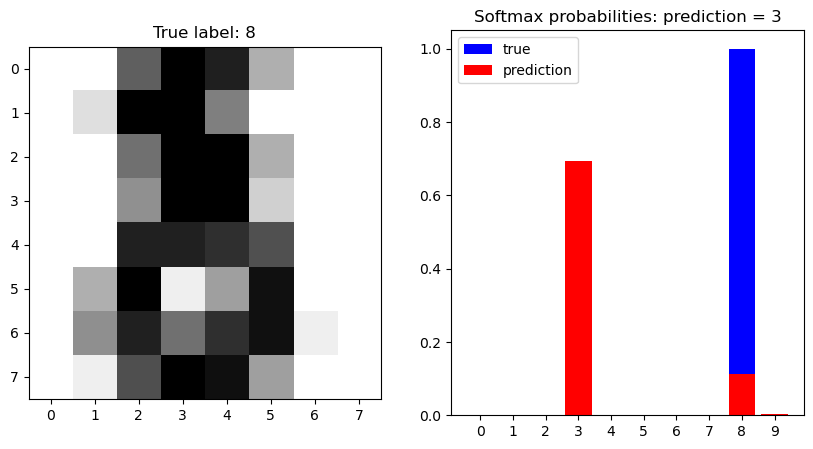

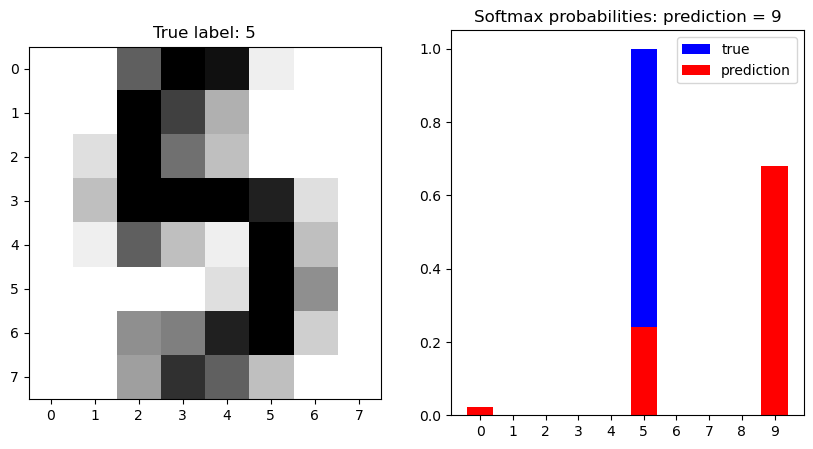

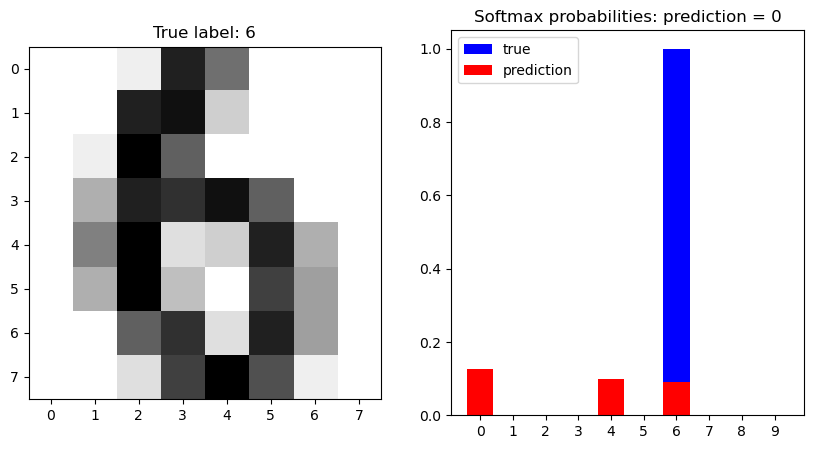

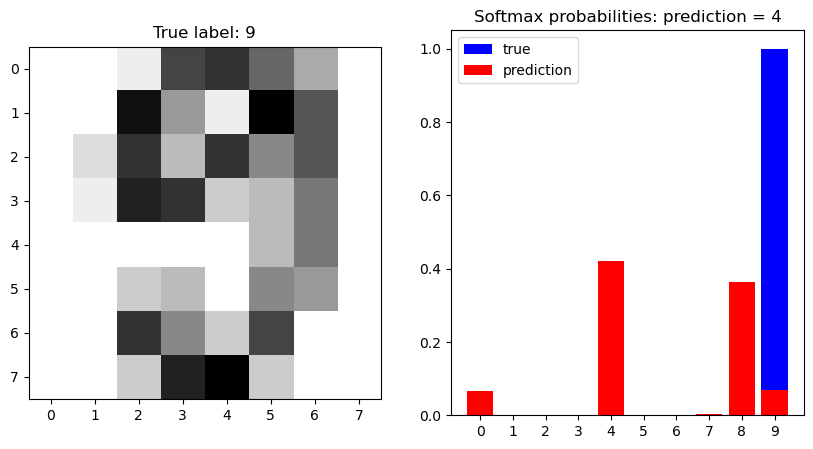

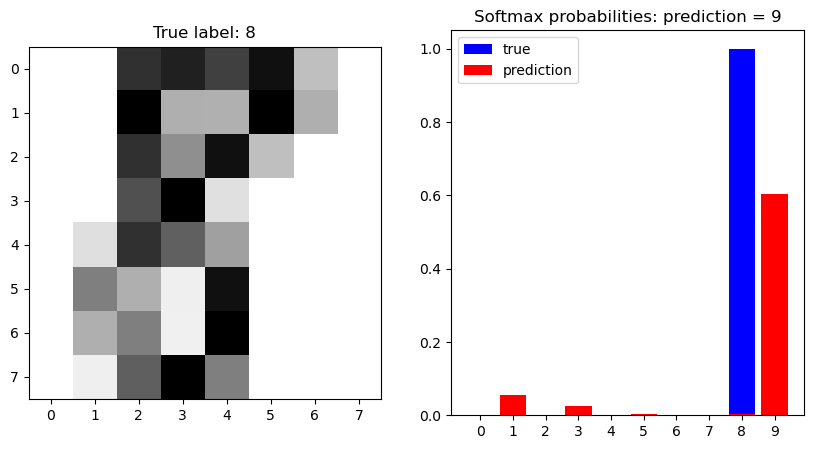

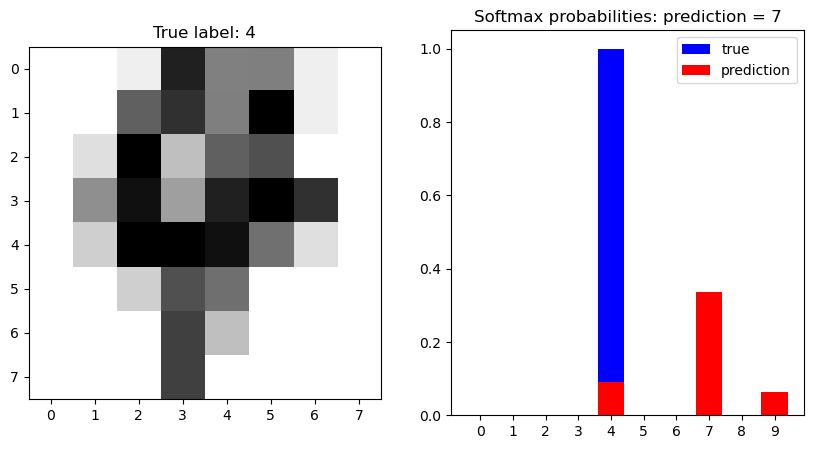

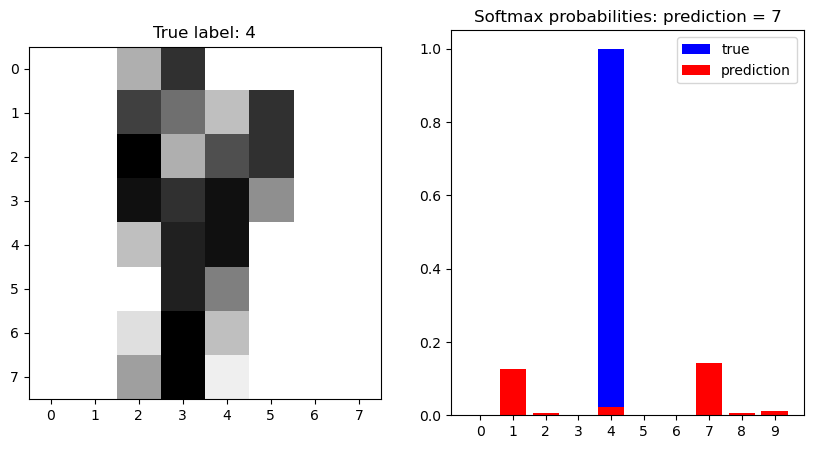

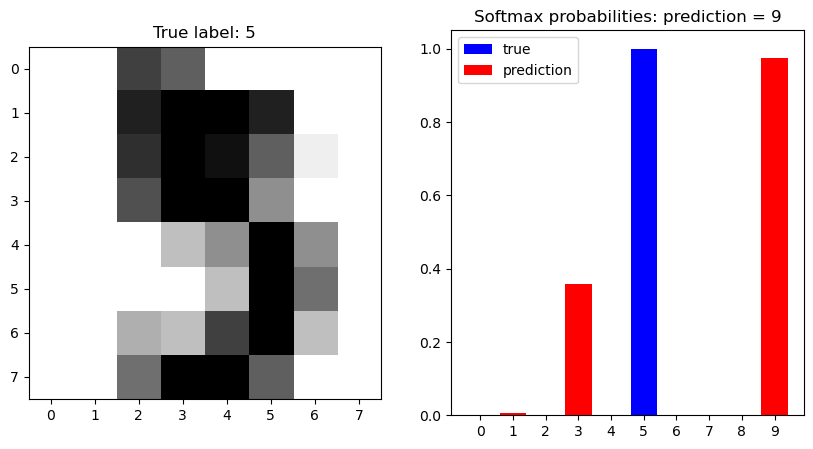

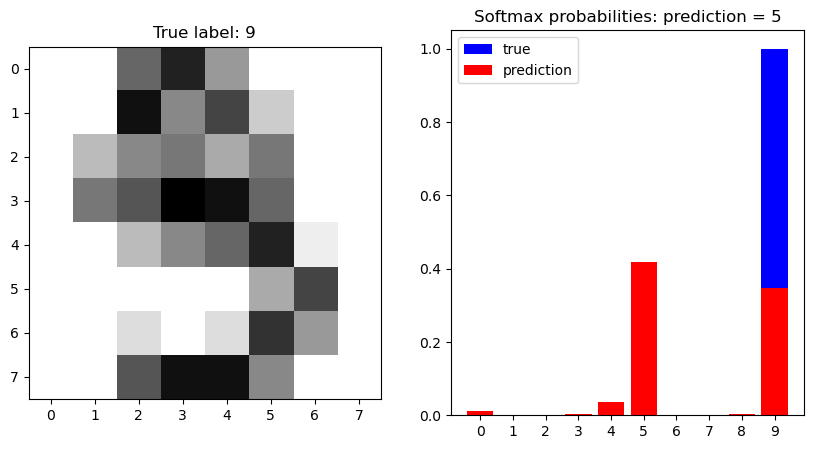

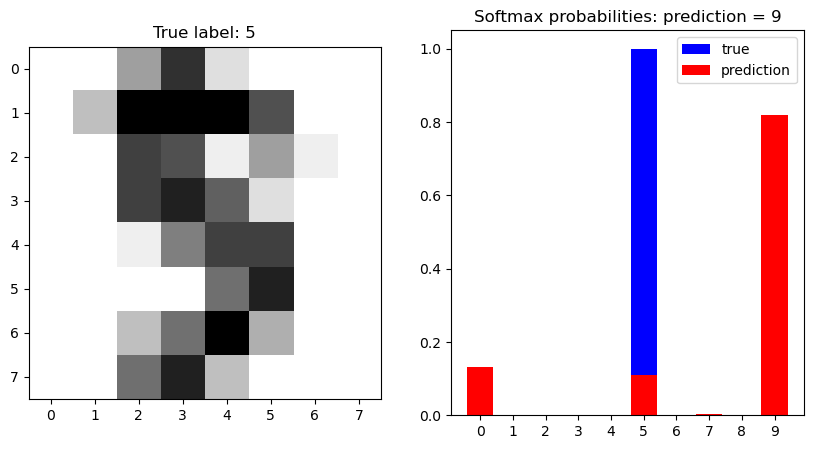

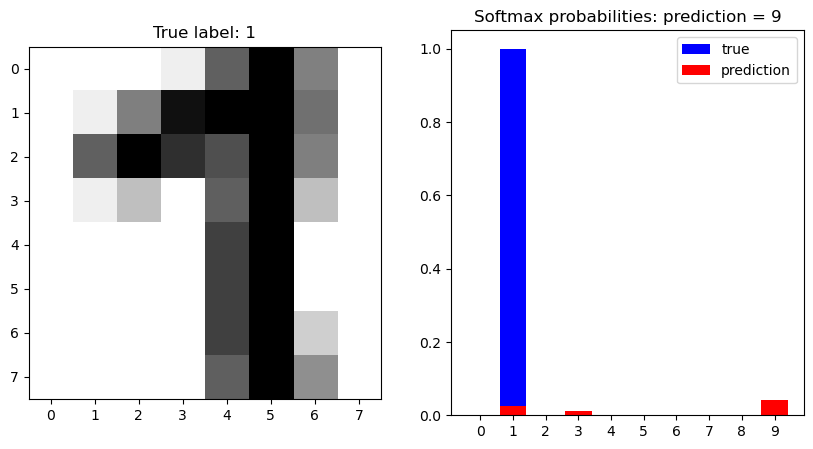

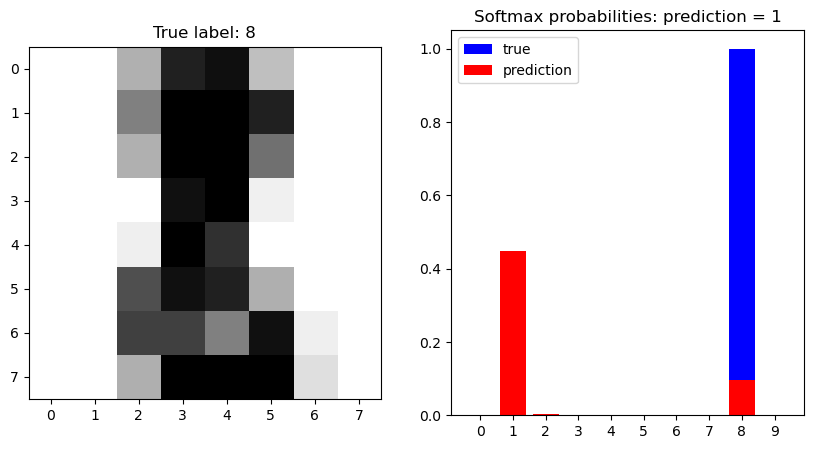

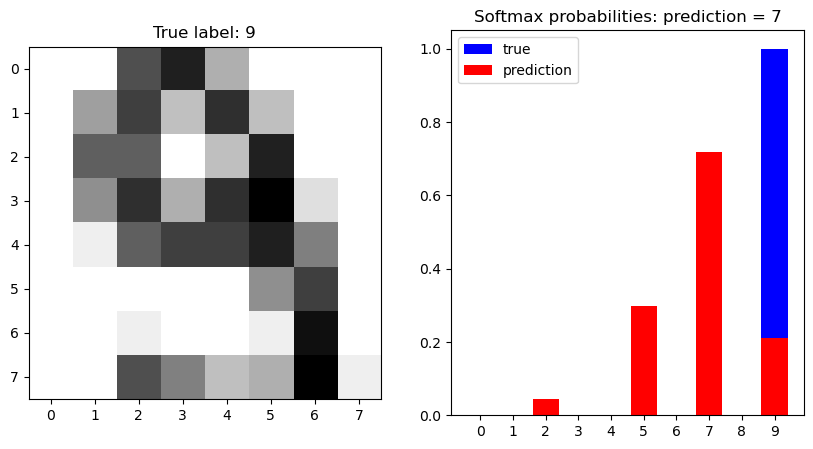

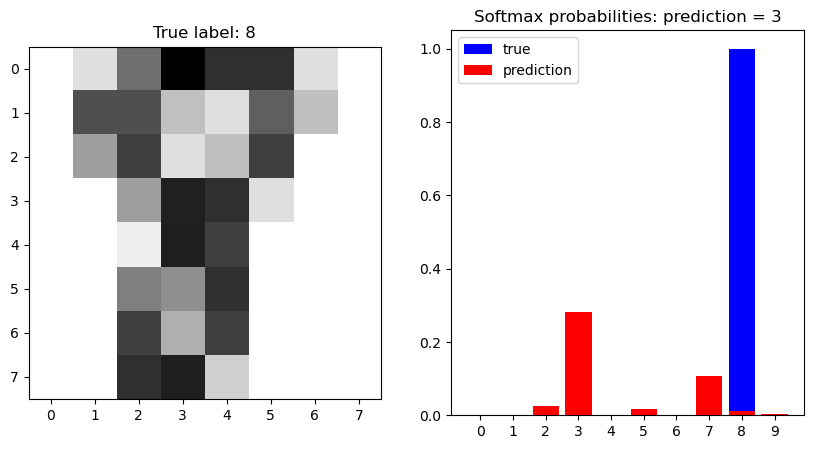

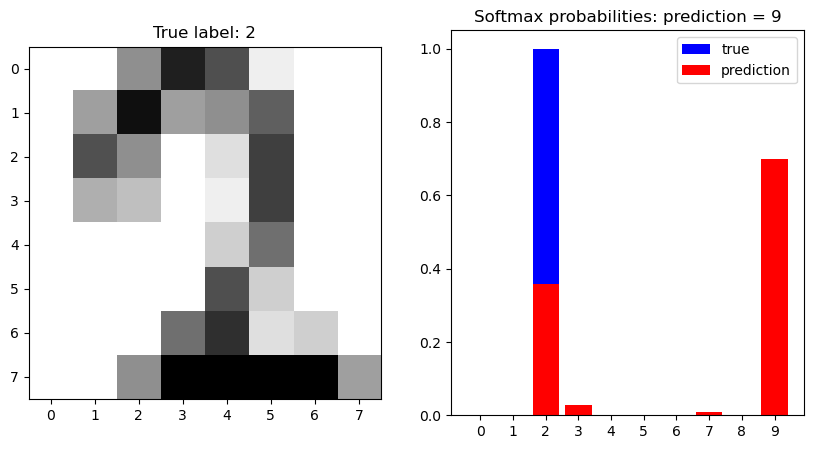

In [25]:
for i in range(y_test.shape[0]):
    if model.predict(X_test[i]) != y_test[i]:
        plot_predictionn(model, sample_idx = i, classes = range(10))

## Keras

In [26]:
import tensorflow as tf
from tensorflow import keras

2022-11-30 01:39:10.935202: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 01:39:11.219897: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-30 01:39:12.090773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda-11.2/lib64:
2022-11-30 01:39:12.094041: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libn

In [27]:
# n_features = 64, n_classes = 10
model = keras.models.Sequential(
[   keras.layers.Input(shape = n_features),
    keras.layers.Dense(units = 10, activation = "sigmoid"),
    keras.layers.Dense(units = n_classes, activation = "sigmoid")]
)

2022-11-30 01:39:13.194942: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-30 01:39:13.233983: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-30 01:39:13.234567: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-30 01:39:13.235884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [28]:
model.compile(optimizer = keras.optimizers.SGD(0.1), loss = keras.losses.SparseCategoricalCrossentropy(), metrics = ["accuracy"])

In [29]:
history = model.fit(X_train, y_train, epochs = 15)

Epoch 1/15
48/48 [==============================] - 2s 8ms/step - loss: 2.1626 - accuracy: 0.3098
Epoch 2/15
48/48 [==============================] - 0s 9ms/step - loss: 1.7880 - accuracy: 0.6306
Epoch 3/15
48/48 [==============================] - 0s 8ms/step - loss: 1.5321 - accuracy: 0.7629
Epoch 4/15
48/48 [==============================] - 0s 8ms/step - loss: 1.3223 - accuracy: 0.8219
Epoch 5/15
48/48 [==============================] - 0s 5ms/step - loss: 1.1479 - accuracy: 0.8494
Epoch 6/15
48/48 [==============================] - 0s 4ms/step - loss: 1.0039 - accuracy: 0.8821
Epoch 7/15
48/48 [==============================] - 0s 5ms/step - loss: 0.8849 - accuracy: 0.8946
Epoch 8/15
48/48 [==============================] - 0s 5ms/step - loss: 0.7859 - accuracy: 0.9083
Epoch 9/15
48/48 [==============================] - 0s 5ms/step - loss: 0.7030 - accuracy: 0.9122
Epoch 10/15
48/48 [==============================] - 0s 5ms/step - loss: 0.6340 - accuracy: 0.9247
Epoch 11/15
48/48 [

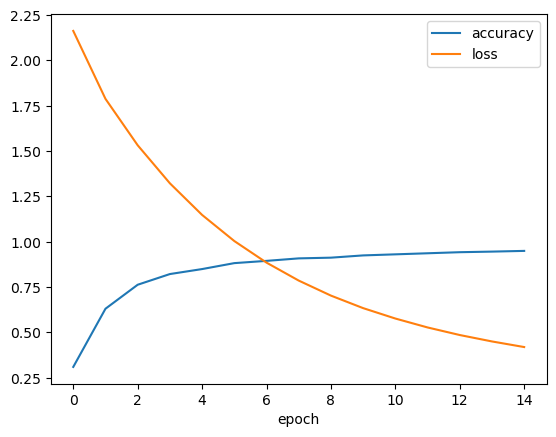

In [30]:
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["loss"], label = "loss")

plt.xlabel("epoch")
plt.legend()


In [31]:
model.predict(X_test[42].reshape(1,-1))

1/1 [==============================] - 0s 74ms/step


array([[0.16701528, 0.76072186, 0.29388532, 0.3683879 , 0.2353883 ,
        0.6281041 , 0.30996406, 0.21788009, 0.9553521 , 0.45476264]],
      dtype=float32)

In [32]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"loss = {loss:0.2f}\naccuracy = {accuracy:0.2f}")

9/9 [==============================] - 0s 6ms/step - loss: 0.4107 - accuracy: 0.9444
loss = 0.41
accuracy = 0.94


In [33]:
def plot_predictionn(model, sample_idx = 0, classes = range(10)):
    fig, axes = plt.subplots(nrows =1, ncols = 2, figsize = (10, 5))

    axes[0].imshow(scaler.inverse_transform([X_test[sample_idx]]).reshape(8,8), cmap = plt.cm.gray_r)
    axes[0].set_title("True label: %i" % y_test[sample_idx])


    axes[1].bar(classes, one_hot(len(classes), y_test[sample_idx]), label='true', color = "b")
    axes[1].bar(classes, model.predict(X_test[sample_idx].reshape(1,-1)).reshape(-1), label = "prediction", color = "r")
    axes[1].set_title(f"Softmax probabilities: prediction = {np.argmax(model.predict(X_test[sample_idx].reshape(1,-1)))}")
    axes[1].set_xticks(np.arange(10))
    axes[1].legend()

In [34]:
model.predict(X_test[42].reshape(1,-1))

1/1 [==============================] - 0s 25ms/step


array([[0.16701528, 0.76072186, 0.29388532, 0.3683879 , 0.2353883 ,
        0.6281041 , 0.30996406, 0.21788009, 0.9553521 , 0.45476264]],
      dtype=float32)

1/1 [==============================] - 0s 21ms/step


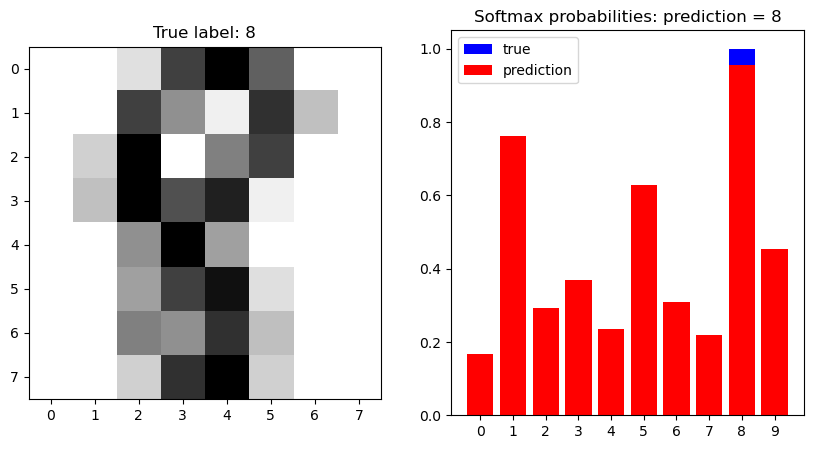

In [35]:
plot_predictionn(model, sample_idx = 42, classes = range(10))

### Check the mistakes

1/1 [==============================] - 0s 23ms/step


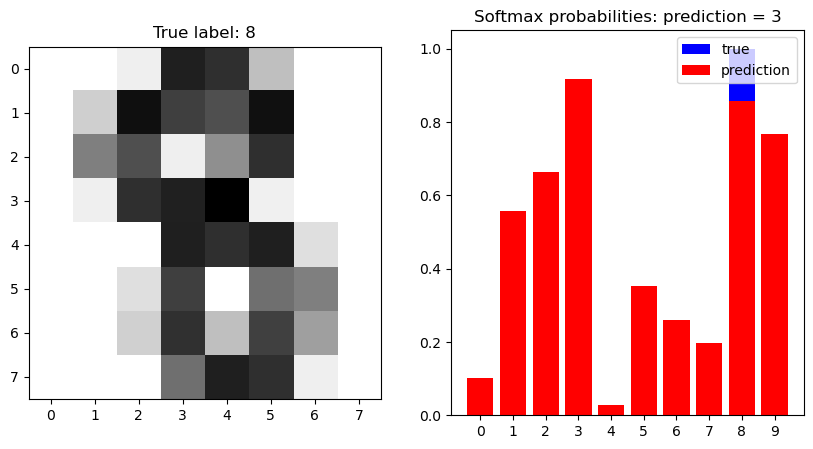

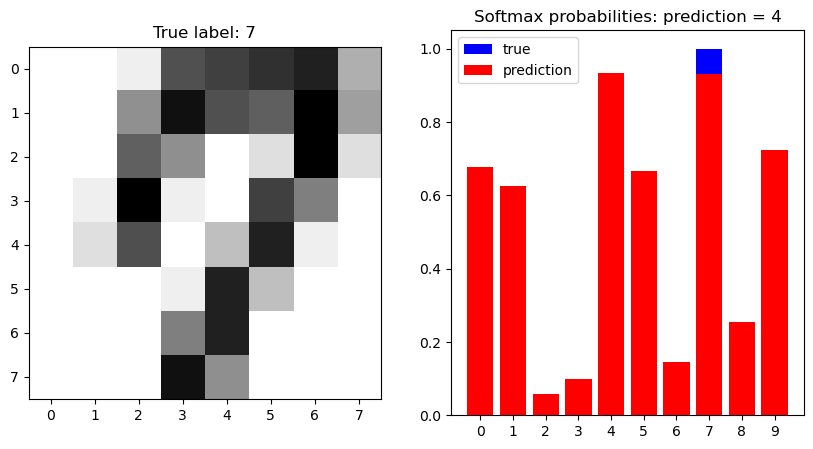

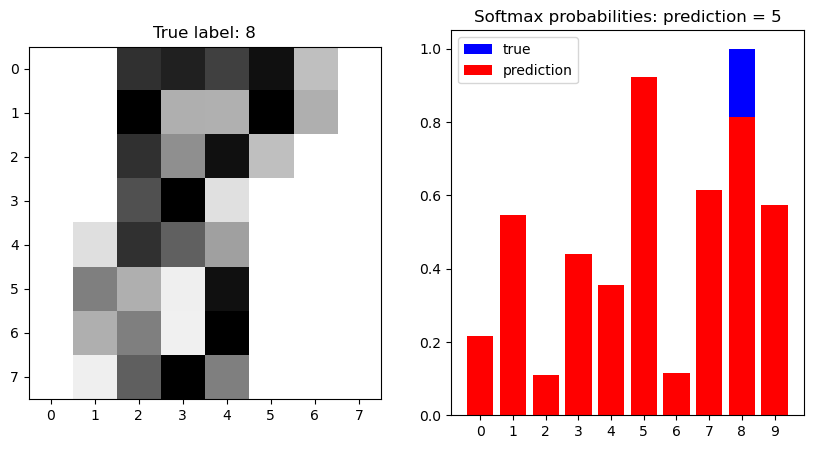

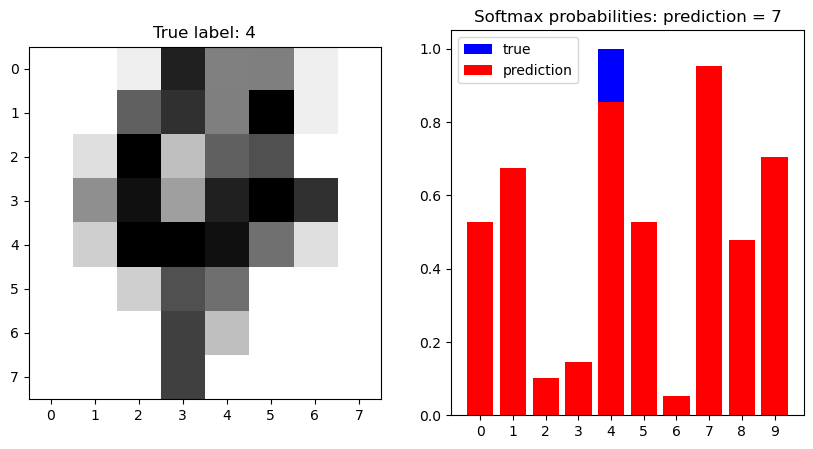

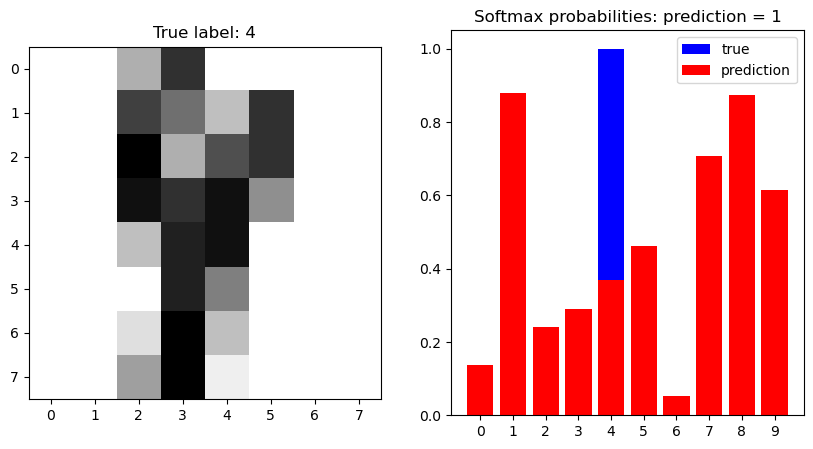

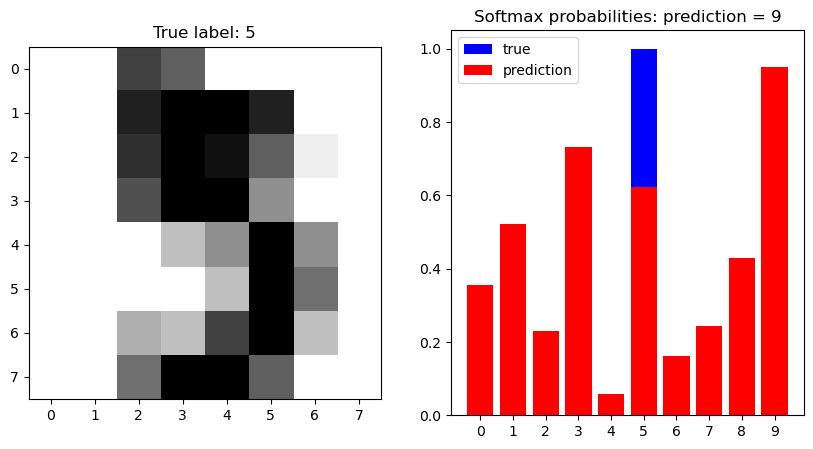

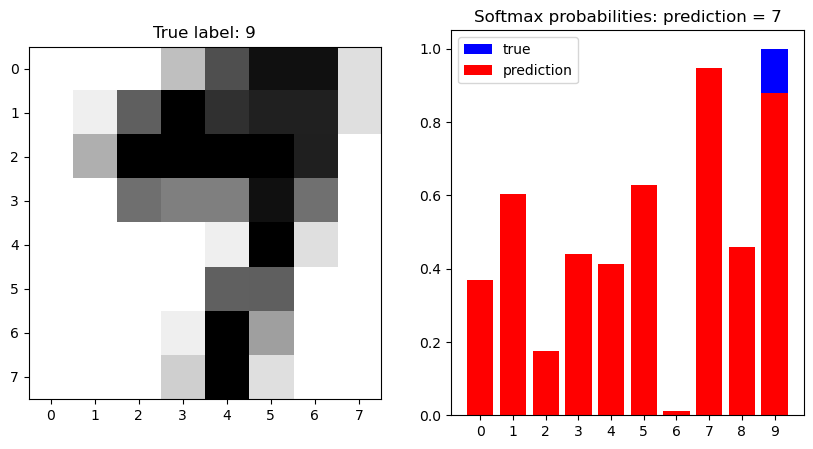

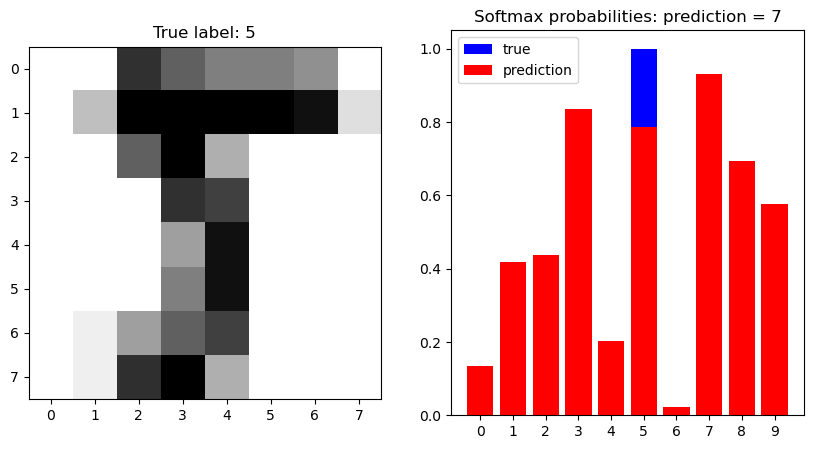

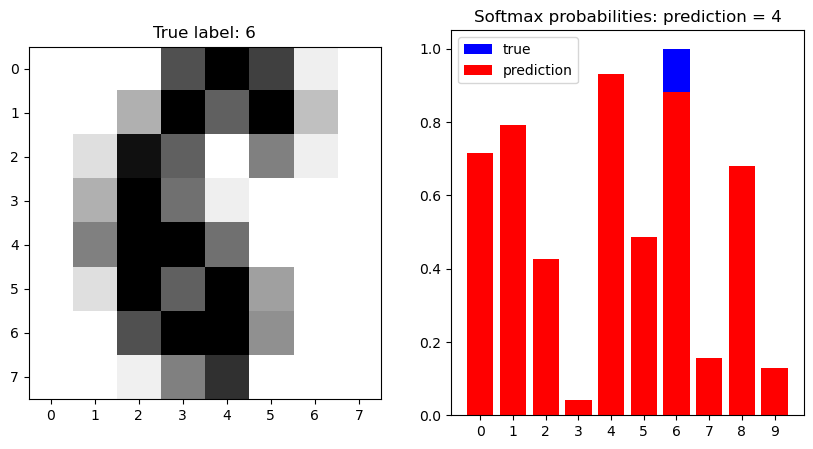

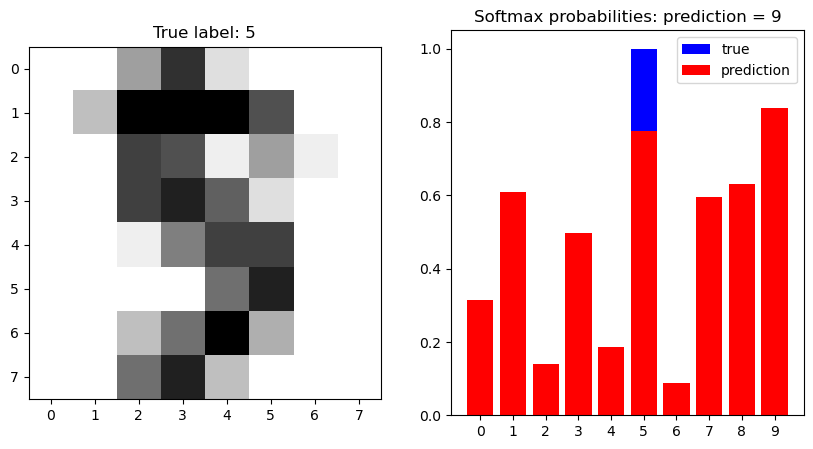

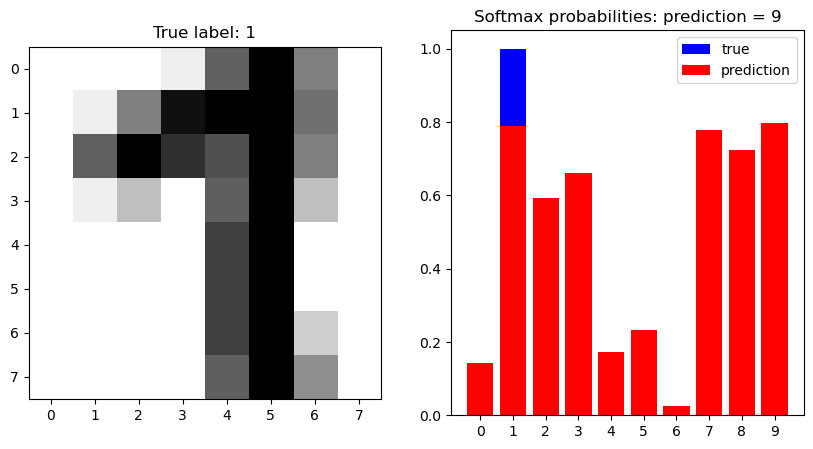

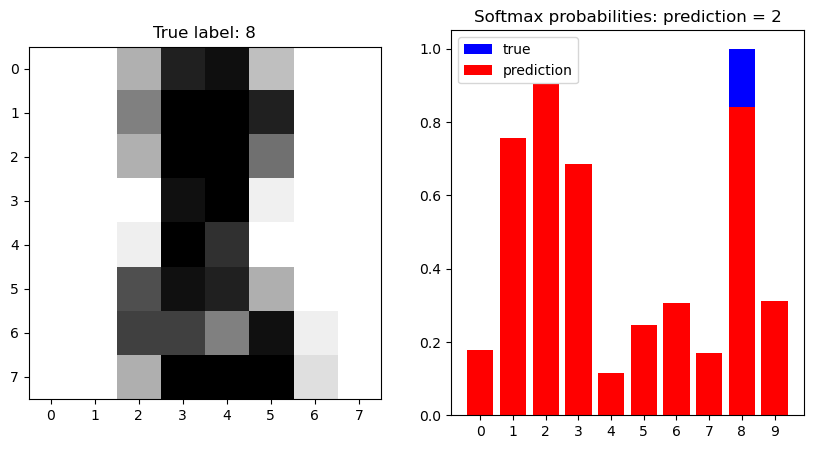

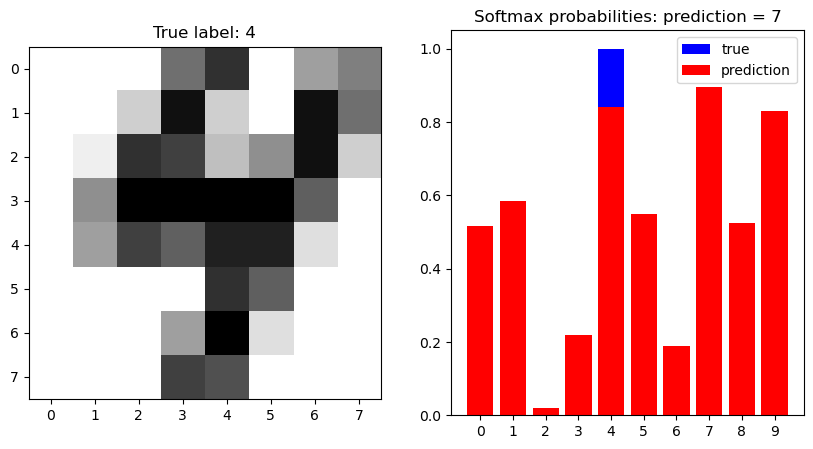

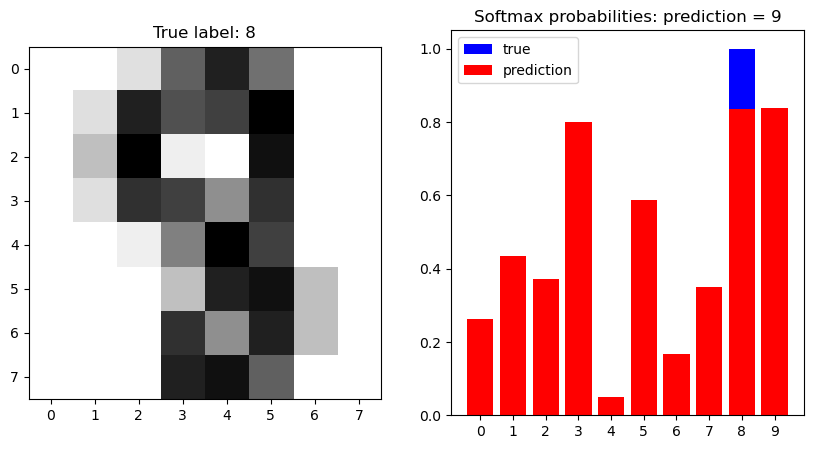

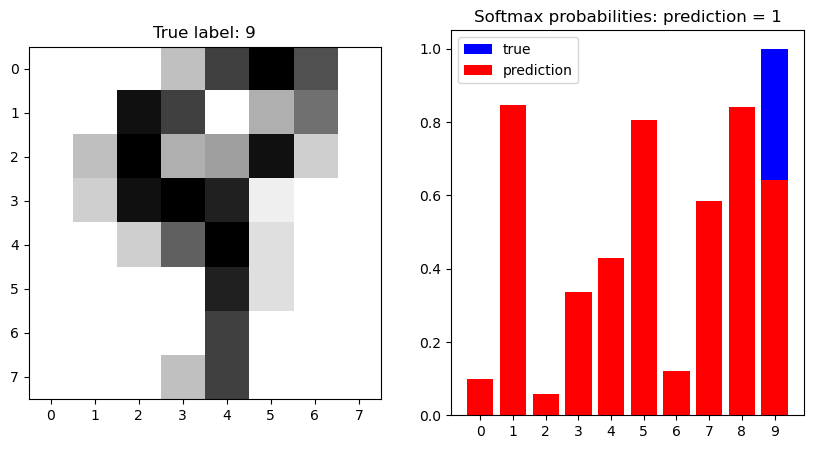

In [36]:
for i in range(y_test.shape[0]):
    if np.argmax(model.predict(X_test[i].reshape(1,-1))) != y_test[i]:
        plot_predictionn(model, sample_idx = i, classes = range(10))